In [ ]:
# la idea es saber si hay más ciclistas a diario o en fin de semana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'
plt.style.use('ggplot')

In [3]:
bikes = pd.read_csv('../J.Evans_Pandas_Cookbook/bikes2012.csv', encoding='latin1', index_col='Date',
                     parse_dates=['Date'], dayfirst=True)

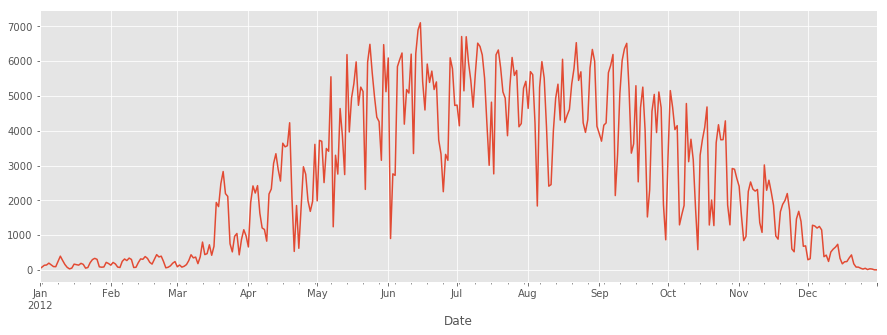

In [4]:
bikes['Berri1'].plot()

In [8]:
berri_bikepath = bikes[['Berri1']].copy()

In [9]:
berri_bikepath.head()

,Berri1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [10]:
berri_bikepath.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [14]:
berri_bikepath.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=366)

In [15]:
berri_bikepath.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=366)

In [16]:
berri_bikepath['weekday'] = berri_bikepath.index.weekday

In [17]:
berri_bikepath

,Berri1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
2012-01-06,146,4
2012-01-07,98,5
2012-01-08,95,6
2012-01-09,244,0


In [25]:
weekday_counts = berri_bikepath.groupby('weekday').aggregate(sum)
# esta otra hace lo mismo:  weekday_counts = berri_bikepath.groupby('weekday').sum()

In [26]:
weekday_counts

,Berri1
weekday,
0,142285
1,145795
2,163603
3,169976
4,150493
5,105635
6,102447


In [27]:
weekday_counts.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='weekday')

In [28]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [29]:
weekday_counts

,Berri1
Monday,142285
Tuesday,145795
Wednesday,163603
Thursday,169976
Friday,150493
Saturday,105635
Sunday,102447


In [37]:
weekday_counts.describe()

,Berri1
count,7.000000
mean,140033.428571
std,26444.097311
min,102447.000000
25%,123960.000000
50%,145795.000000
75%,157048.000000
max,169976.000000


In [40]:
# devuelve el índice del valor máximo
weekday_counts.idxmax()

Berri1    Thursday
dtype: object

In [41]:
# devuelve el valor máximo
weekday_counts.max()

Berri1    169976
dtype: int64

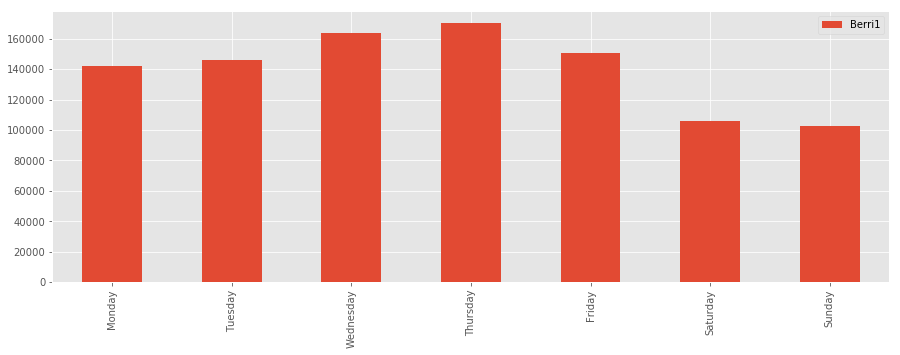

In [44]:
weekday_counts.plot(kind='bar')